# Import data and libraries

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
path = r'/Users/alejandrosalgado/Desktop/Instacart Basket Analysis'

In [5]:
ords_prods_merge = pd.read_pickle(r'/Users/alejandrosalgado/Desktop/Instacart Basket Analysis/02 Data/Prepared Data/orders_products_merged_v3.pkl')

In [6]:
ords_prods_merge.head()

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,10,New customer
1,2398795,1,2,3,7,15.0,False,196,1,1,...,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Fewest orders,10,New customer
2,473747,1,3,3,12,21.0,False,196,1,1,...,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer
3,2254736,1,4,4,7,29.0,False,196,1,1,...,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Fewest orders,10,New customer
4,431534,1,5,4,15,28.0,False,196,1,1,...,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most orders,10,New customer


<AxesSubplot:>

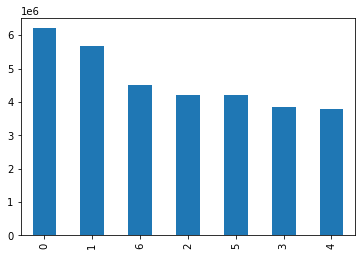

In [7]:
# create a bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

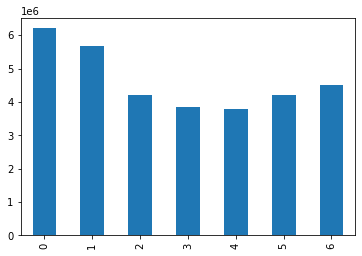

In [8]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

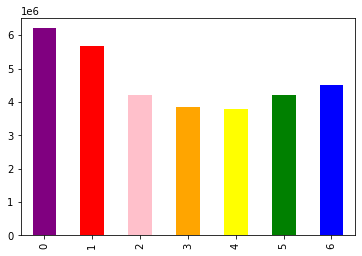

In [9]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple','red','pink','orange','yellow','green','blue'])

In [10]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Histograms

<AxesSubplot:ylabel='Frequency'>

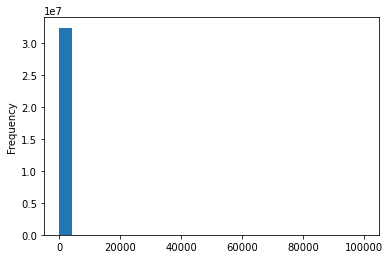

In [11]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [12]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<AxesSubplot:xlabel='prices', ylabel='prices'>

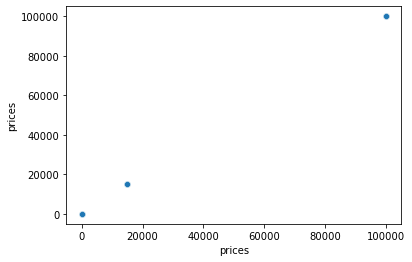

In [13]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [14]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag
10030345,912404,17,12,2,14,5.0,False,21553,5,0,...,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer
10030346,603376,17,22,6,16,4.0,False,21553,3,1,...,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer
10030347,3264360,135,2,2,21,13.0,False,21553,6,0,...,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer
10030348,892534,135,3,0,8,12.0,False,21553,3,1,...,108,16,14900.0,both,High-range product,Busiest day,Busiest days,Most orders,4,New customer
10030349,229704,342,8,1,19,30.0,False,21553,9,0,...,108,16,14900.0,both,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,False,33664,1,0,...,84,16,99999.0,both,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer
29166210,2363282,204099,31,0,9,2.0,False,33664,1,1,...,84,16,99999.0,both,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer
29166211,3181945,204395,13,3,15,8.0,False,33664,25,0,...,84,16,99999.0,both,High-range product,Regularly busy,Slowest days,Most orders,15,Regular customer
29166212,2486215,205227,7,3,20,4.0,False,33664,8,0,...,84,16,99999.0,both,High-range product,Regularly busy,Slowest days,Average orders,12,Regular customer


In [15]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [16]:
ords_prods_merge['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

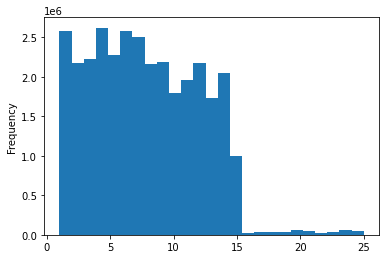

In [17]:
ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:ylabel='Frequency'>

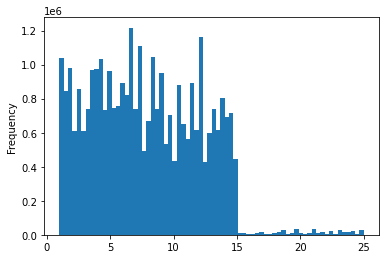

In [18]:
ords_prods_merge['prices'].plot.hist(bins = 70)

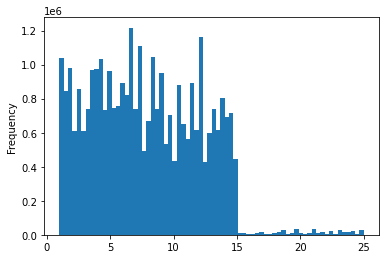

In [19]:
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [20]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

# Line charts

In [21]:
# create a list holding True/False vaue to the test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [22]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [23]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [24]:
len(ords_prods_merge)

32404859

In [25]:
# store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [26]:
# store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [27]:
len(ords_prods_merge)

32404859

In [28]:
len(big) + len(small)

32404859

In [29]:
df_2 = small[['orders_day_of_week','prices']]

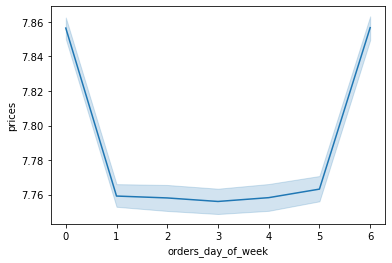

In [30]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [31]:
crosstab = pd.crosstab(ords_prods_merge['days_since_prior_order'], ords_prods_merge['order_number'], dropna = False)
